In [1]:
import os
import darknet
import pydarknet

from PIL import ImageDraw as PILImageDraw

In [2]:
# Darknet is stupid... so all paths are relative at the moment.
os.chdir("..")
# Load the ImageNet 1k labels/metadata
coco = darknet.Metadata("cfg/coco.data")

In [3]:
# Load the Model
detector = pydarknet.ImageDetector(
    coco.classes,
    "cfg/yolov4.cfg",
    "weights/yolov4.weights"
)

In [4]:
# Define a funtion for drawing the detections...
def draw_detections(img, detections):
    img = img.copy()
    draw = PILImageDraw.Draw(img)
    colors = ["purple", "blue", "green", "pink", "brown"]
    def xywh_to_bounds(x,y,w,h):
        return x-w/2, y-h/2, x+w/2, y+h/2
    for i, (cat, prob, xywh) in enumerate(detections):
        text = f"{cat}@{prob:.2%}"
        bounds = xywh_to_bounds(*xywh)
        t_w,t_h = draw.textsize(text)
        draw.rectangle(xywh_to_bounds(*xywh), outline=colors[i%5], width=4)
        draw.rectangle((bounds[0], bounds[1]-t_h, bounds[0]+t_w+4, bounds[1]), fill=colors[i%5])
        draw.text((bounds[0]+2,bounds[1]-t_h), text, fill="white")
    return img

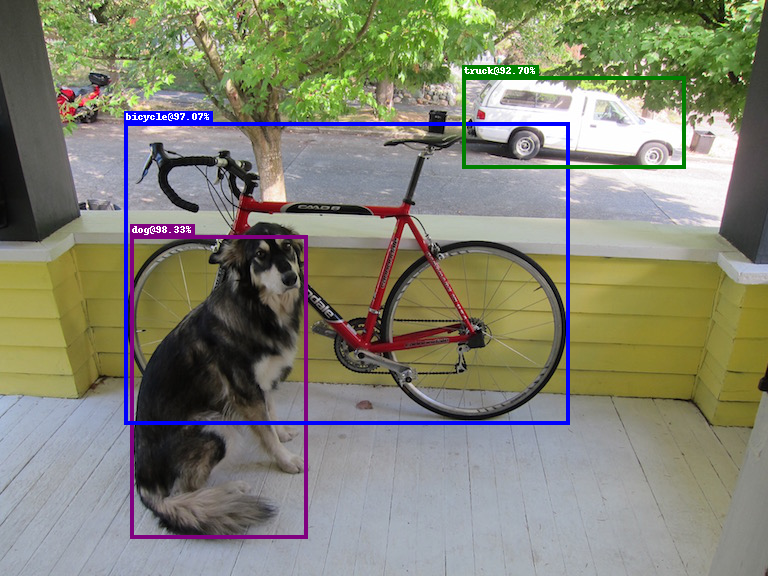

In [5]:
img = pydarknet.Image.open("data/dog.jpg")
dets = detector.detect(img)
draw_detections(img, dets)

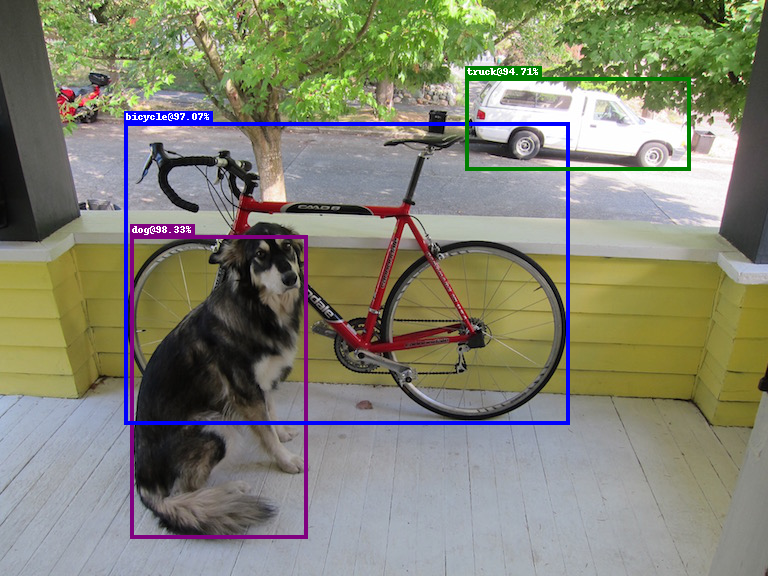

In [18]:
draw_detections(img, detector.get_detections(nms_type="sort", nms_threshold=.4))

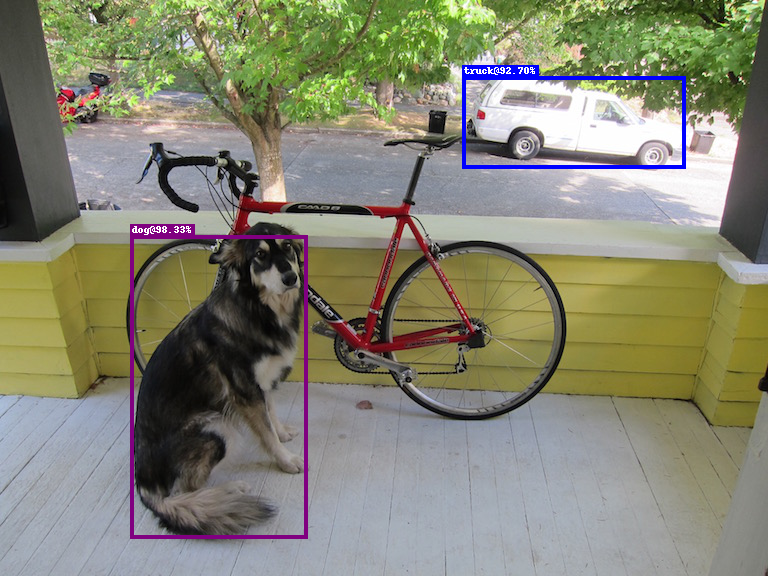

In [15]:
draw_detections(img,detector.get_detections(nms_type="obj", nms_threshold=.1))

In [6]:
del detector